# test segmentation learner

In [1]:
%load_ext autoreload
from pathlib import Path
import sys
sys.path.append(str(Path('../../').resolve()))

In [9]:
from torch.utils.data import DataLoader
from pytorch_unet.learner import UNetLearner, StaticLRPolicy, EpochCountTrainStopCondition
from pytorch_unet.datasets import SegmentationTestDataset
from pytorch_unet.models import CustomResNetUNet

In [8]:
dataset = SegmentationTestDataset(item_size=(100, 100), item_count=10)
train_loader = DataLoader(dataset)
valid_loader = DataLoader(dataset)
model = CustomResNetUNet(in_size=dataset.item_size, in_channels=dataset.image_channels, n_classes=len(dataset.classes), depth=3)
learner = UNetLearner(model=model, lr_policy=StaticLRPolicy(3e-3),\
                      train_loader=train_loader, valid_loader=valid_loader)

In [10]:
learner.train(stop_condition=EpochCountTrainStopCondition(1))

LEARNER::::::::: Epoch 0
LEARNER::::::::: train_loss 0.6869442582130432
LEARNER::::::::: valid_loss 0.6738370895385742
LEARNER::::::::: train_accuracy 0.7015399999999999
LEARNER::::::::: valid_accuracy 0.7691800000000001
LEARNER::::::::: learning rate: 0.003
LEARNER::::::::: ------------------


In [11]:
checkpoint = learner.make_checkpoint()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

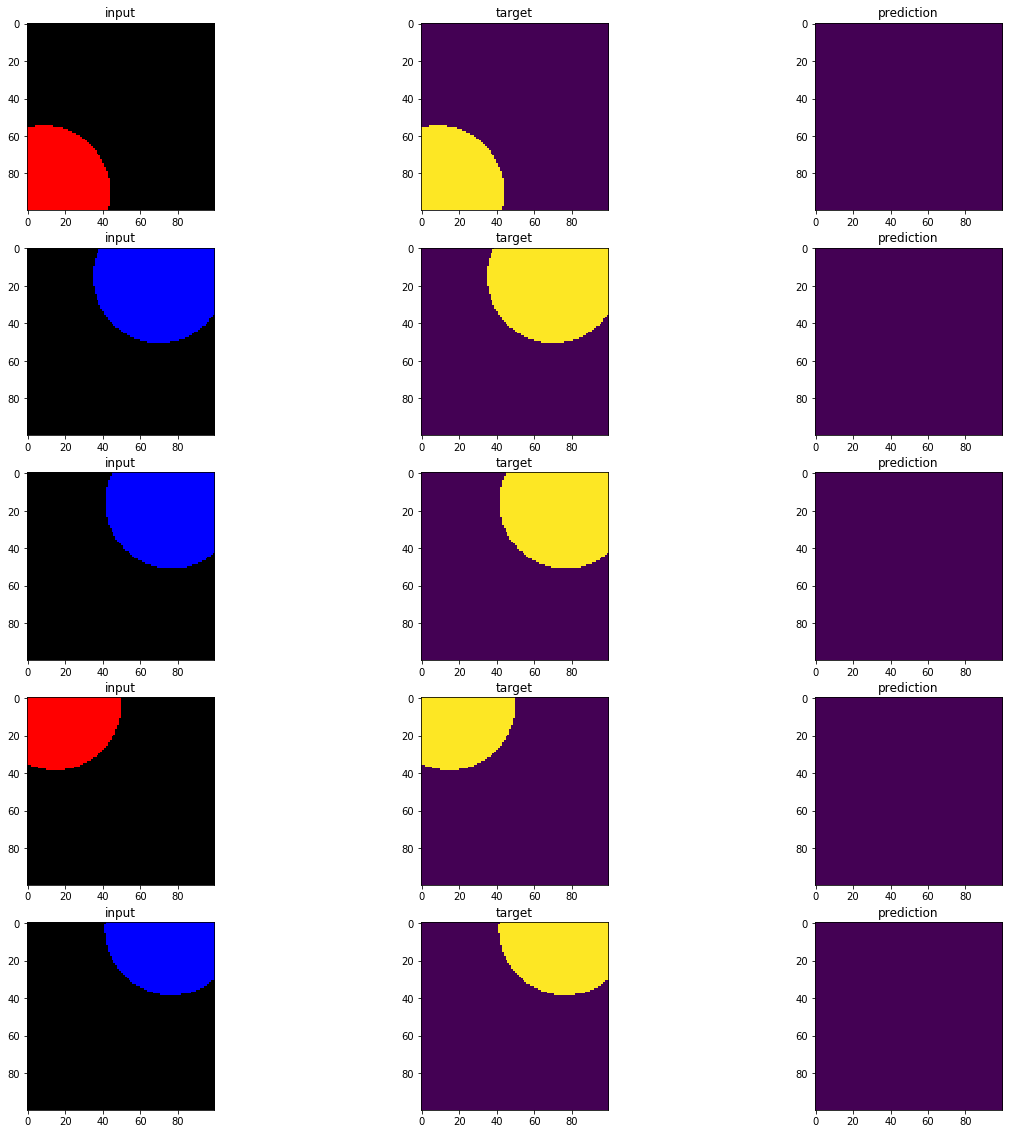

In [12]:
checkpoint.train_results_figure